<a href="https://colab.research.google.com/github/hadwin-357/ML_Chem/blob/main/SMARTS_reaction_create_new_molecules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi==2022.3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.7/22.7 MB 6.0 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import time
IPythonConsole.ipython_useSVG =False

**Making new molecule using reaction SMARTS**


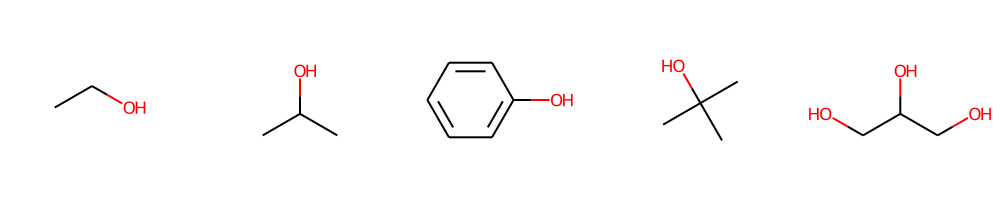

In [ ]:
# reagents
ethanol = Chem.MolFromSmiles('CCO')
isopropanol = Chem.MolFromSmiles('CC(C)O')
phenol = Chem.MolFromSmiles('c1cccc(O)c1')
t_butanol = Chem.MolFromSmiles('C(C)(C)(C)O')
glycerol = Chem.MolFromSmiles('OCC(O)CO')

alcohols = [ethanol, isopropanol, phenol, t_butanol, glycerol]

Draw.MolsToGridImage(alcohols, molsPerRow=5)

In [ ]:
# reaction
from rdkit.Chem import AllChem
rxn_1 = AllChem.ReactionFromSmarts('[#6:1][O:2]>>[#6:1]=[O:2]')

In [ ]:
product=rxn_1.RunReactants((glycerol , ))[0][0]
Chem.SanitizeMol(product)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

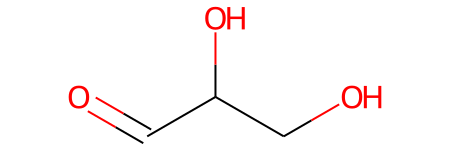

In [ ]:
product

In [ ]:
#mulitple products
from itertools import chain # flatten lists or tuples
gly_prodcuts=list(chain.from_iterable(rxn_1.RunReactants((glycerol , ))))
[Chem.SanitizeMol(mol) for mol in gly_prodcuts]

[rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE,
 rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE,
 rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE]

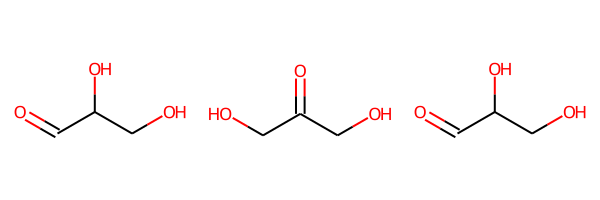

In [ ]:
Draw.MolsToGridImage(gly_prodcuts)

In [ ]:
product=rxn_1.RunReactants((phenol , ))[0][0]
try:
    Chem.SanitizeMol(product)
except ValueError:
    print('Sanitization FAILED!')

Sanitization FAILED!


In [ ]:
# complicated examples: two reagents
thiourea = Chem.MolFromSmiles('CN(C)C(=S)N')
haloketone = Chem.MolFromSmiles('c1ccccc1C(=O)C(C)Cl')
rxn_smarts = '[NH2:1][C:2](=[S:3])[NH0:4].[C:5](=[O:6])[C:7][Cl:8]>>[N:4][c:2]1[s:3][c:5][c:7][n:1]1'
rxn = AllChem.ReactionFromSmarts(rxn_smarts)
product = rxn.RunReactants((thiourea, haloketone))[0][0] # the order matters in oder to match the reaction
Chem.SanitizeMol(product)


rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

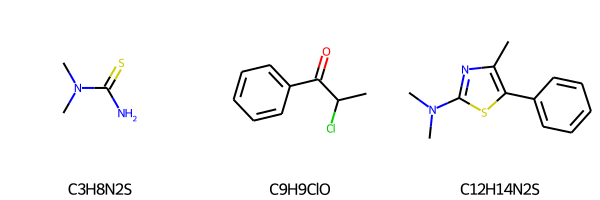

In [ ]:
from rdkit.Chem import rdMolDescriptors
all_three = [thiourea, haloketone, product]
formulae = [rdMolDescriptors.CalcMolFormula(mol) for mol in all_three]
Draw.MolsToGridImage(all_three, legends = formulae)

